In [1]:
#url = 'https://raw.githubusercontent.com/flavianowilliams/M3L/development/src/notebooks/argon/Ar_94K_1atm.json'
#from urllib.request import urlopen
#file = urlopen(url)
#with open('Ar_94K_1atm.json','wb') as output:
#  output.write(file.read())
#
# carregando sistema físico
from m3l.structure import System as sys
import json
#
system = sys()
#system.loadSystem('teste.json')
system.loadSystem('Ar_94K.json')
#
# convertendo as unidades de medida
system.convertUnits()

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
dataset = np.loadtxt("thermodynamics.csv", dtype=np.float32, delimiter = ",", skiprows=1)
time = [item[0].item() for item in dataset]
data = [item[5].item() for item in dataset]

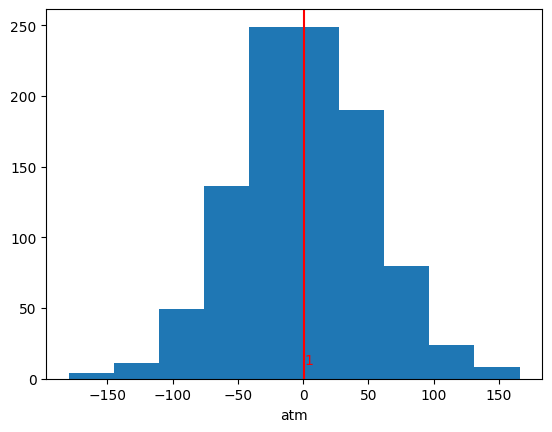

In [4]:
import statistics as stats
natom = system.natom
pressao_externa = 1
plt.hist(data)
plt.xlabel("atm")
plt.axvline(pressao_externa, color = 'red')
plt.annotate(text = f'{pressao_externa}', xy = (pressao_externa, 10), xytext = (pressao_externa, 10), color = 'red')
plt.show()

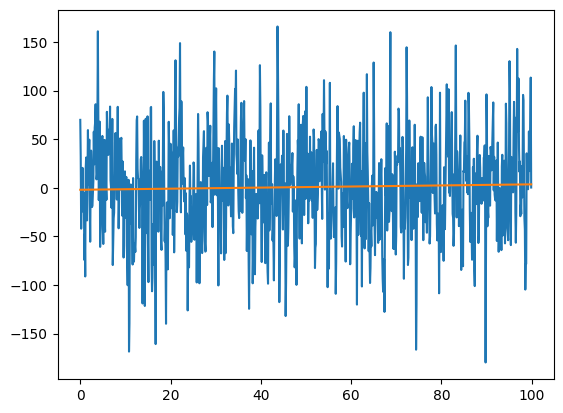

In [5]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(np.array(time).reshape((-1,1)), np.array(data))
A = regressao.coef_
B = regressao.intercept_
y = list(map(lambda u: A*u+B, time))
plt.plot(time, data)
#print(y)
plt.plot(np.array(time).reshape((-1, 1)), np.array(y))

In [6]:
# teste de normalidade de Shapiro-Wilk
from scipy import stats
statistic, pvalue = stats.shapiro(data)
print(f'Valor-p: {pvalue}')
if pvalue >= 0.05:
    print('A distribuição é considerada normal.')
else:
    print('A distribuição NÃO é considerada normal.')

Valor-p: 0.29603223773842524
A distribuição é considerada normal.
